
# 모듈(Module)
- 함수나 변수 또는 클래스들을 모아 놓은 파일  
- 다른 파이썬 프로그램에서 불러와 사용할 수 있게끔 만들어진 파이썬 파일  
1. 모듈 불러오기  
- import 모듈 이름  
- 모듈 이름은 .py 확장자를 제거한 파일 이름  
2. import 모듈 이름 as 별명  
- 모듈 이름을 별명으로 사용  
3. from 모듈 이름 import 모듈 함수  
- 모듈 이름을 붙이지 않고 바로 해당 모듈의 함수  
예제) 모듈 불러오기


## __name__내장변수  
```
if __name__ == '__main__':  
스크립트 파일이 메인 프로그램으로 사용될 때와 모듈로 사용될 때를 구분하기 위한 용도로 __name__을 사용함.  
   1) 파일이름.py로 직접 실행된 경우  : __name__ 에 ‘__main__'이 저장됨  
   2) import된 모듈로  실행된 경우    : __name__ 에 ’모듈이름(파일이름)‘이 저장됨  
예) # hello.py  
print('hello 모듈 시작')  
print('hello.py __name__:', __name__)    # __name__ 변수 출력  
print('hello 모듈 끝')  
# main.py  
import hello    # hello 모듈을 가져옴  
print('main.py __name__:', __name__)    # __name__ 변수 출력  

```



#파일(File)


### **파일 생성**
+ 파일 객체 = open(파일 이름, 파일 열기 모드, encoding='UTF-8’)
 - 파일명이 한글일 경우는 encoding='UTF-8＇을 사용

### **파일출력함수 : write()**
### **파일입력함수(읽기)**
+ readline(): 파일의 첫 번째 줄을 읽어 출력하는 경우
+ readlines(): 파일의 모든 라인을 읽어서 각각의 줄을 요소로 갖는 리스트로 리턴
+ read(): 파일의 내용 전체를 문자열로 리턴

### **파일 닫기**
+ 파일 객체.close()




In [1]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


##1. 파일 출력 실습  
파일출력함수 : write()  
파일 열기모드 w(쓰기), a(추가)  



##[실습]구글드라이브에 text.txt 파일을 만들고 파일의 내용을 작성해 보자.

In [2]:
f = open('test.txt', 'w')
inData = input('기록할 내용 : ')
f.write(inData + '\n')
inData = input('기록할 내용 : ')
f.write(inData + '\n')
f.close()

기록할 내용 : hello
기록할 내용 : hello


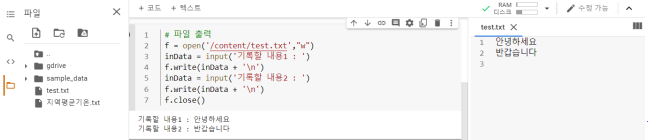

##[실습]구글드라이브에 작성한 text.txt 파일을 열고 파일의 내용을 추가해 보자.

In [3]:
f = open('test.txt', 'a')
data = input()
f.write(data + '\n')
f.close()

hello


##2) 파일입력  
### **파일입력함수(읽기)**
+ readline(): 파일의 첫 번째 줄을 읽어 출력하는 경우
+ readlines(): 파일의 모든 라인을 읽어서 각각의 줄을 요소로 갖는 리스트로 리턴
+ read(): 파일의 내용 전체를 문자열로 리턴



In [4]:
f = open('test.txt', 'r')
print(data)
while 1:
  data = f.readline()
  if not data:
    break
  print(data)

hello
hello

hello

hello



In [5]:
#readlines() : 파일 내용을 리스트로 반환
f = open('test.txt', 'r')
print(*f.readlines(), sep='')

hello
hello
hello



In [6]:
#read() : 파일내용 전체를 문자열로 반환
f = open('test.txt', 'r')
print(f.read())
print(type(f.read()))

hello
hello
hello

<class 'str'>


In [7]:
#지역평균기온 읽어오기
f = open('지역평균기온.txt', 'w')
data = '서울, 20\n부산, 26\n대구, 24\n인천, 24\n광주, 25\n'
f.write(data)
f.close()
f = open('지역평균기온.txt', 'r')
print(*f.readlines())

서울, 20
 부산, 26
 대구, 24
 인천, 24
 광주, 25



In [8]:
#지역평균기온 딕셔너리에 저장하기
dt = {}
f = open('지역평균기온.txt', 'r')
data = f.readlines()
for line in data:
  line = line.replace('\n', '')
  line = line.replace(' ', '')
  items = line.split(',')

  dt[items[0]] = int(items[1])
print(dt)
print(f'평균기온 : {sum(dt.values())/len(dt.values()):.2f} 도')

{'서울': 20, '부산': 26, '대구': 24, '인천': 24, '광주': 25}
평균기온 : 23.80 도



### **파일을 open한 후 with…as 구문이 끝나면 자동으로 close**
```
with open(파일 경로, 모드) as 파일 객체:
```

In [9]:

with open('지역평균기온.txt', 'r') as f:
  data = f.readlines()
print(data)

['서울, 20\n', '부산, 26\n', '대구, 24\n', '인천, 24\n', '광주, 25\n']


(실습문제1) 지역평균기온.txt 파일을 읽어서 딕션너리를 만들고, 아래와 같이 그래프를 표시하시오.


{'서울': 20, '부산': 26, '대구': 24, '인천': 24, '광주': 25}


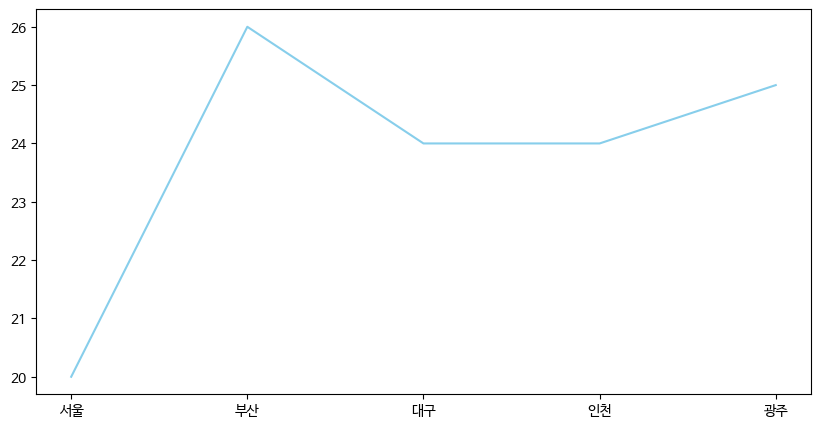

In [4]:
import matplotlib.pyplot as p

dct = {}
with open('지역평균기온.txt', 'r', encoding='UTF-8') as f:
  data = f.readlines()
for item in data:
  key, value = item.split(',')
  dct[key] = int(value)
print(dct)

area = list(dct.keys())
temp = list(dct.values())

p.rc('font', family='NanumBarunGothic')
p.figure(figsize = (10, 5))
p.plot(area, temp, color='skyblue')
p.xticks(rotation = 0)
p.show()


In [11]:
# # 나눔 글꼴 설치

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [12]:
#matplotlib import

import matplotlib

In [13]:
#1.런타임 -세션 다시 시작 ,모두 재실행


##[해결]1. 구글드라이브를 마운트하여 test2.txt를 쓰기용도로 생성한 후 아래와 같은 내용을 파일에 추가하시오.

```
1번째 내용입니다.
2번째 내용입니다.
3번째 내용입니다.
4번째 내용입니다.
5번째 내용입니다.
```

In [3]:
with open('test2.txt', 'w') as f:
  f.write("1번째 내용입니다.\n2번째 내용입니다.\n3번째 내용입니다.\n4번째 내용입니다.\n5번째 내용입니다.")

##[해결]2. test2.txt 파일을 읽기용으로 open하여 화면으로 출력하시오.
```
[출력]
1번째 내용입니다.
2번째 내용입니다.
3번째 내용입니다.
4번째 내용입니다.
5번째 내용입니다.
```


In [5]:
#코드를 작성
with open('test2.txt') as f:
  print(f.read())

1번째 내용입니다.
2번째 내용입니다.
3번째 내용입니다.
4번째 내용입니다.
5번째 내용입니다.


###[해결]3. 구글드라이브를 마운트 하여 아래와 같은 데이터가 들어있는 score.txt 성적파일을 생성하시오.
```
국어,80
영어,96
수학,94
과학,84
음악,95
체육,100
정보,90
```


In [6]:
#코드 작성
with open('score.txt', 'w') as f:
  f.write("국어,80\n영어,96\n수학,94\n과학,84\n음악,95\n체육,100\n정보,90")

###[해결]4. score.txt파일을 읽어들여 딕셔너리로 저장하고, 합계와 평균 점수를 출력하시오.

In [8]:
with open('score.txt', 'r') as f:
  data = f.readlines()
dct = {}
for item in data:
  key, value = item.split(',')
  dct[key] = int(value)
print(dct)
print(sum(dct.values()), f"{sum(dct.values())/len(dct.values()):.2f}")

{'국어': 80, '영어': 96, '수학': 94, '과학': 84, '음악': 95, '체육': 100, '정보': 90}
639 91.29
